In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import datetime as dt 
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from scipy import stats

sns.set(rc={'figure.figsize': [15, 15]}, font_scale=1.2)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%matplotlib inline

# what I am given as data describition --> 
Sno - Serial number
ObservationDate - Date of the observation in MM/DD/YYYY
Province/State - Province or state of the observation (Could be empty when missing)
Country/Region - Country of observation
Last Update - Time in UTC at which the row is updated for the given province or country. (Not standardised and so please clean before using it)
Confirmed - Cumulative number of confirmed cases till that date
Deaths - Cumulative number of of deaths till that date
Recovered - Cumulative number of recovered cases till that date

In [3]:
df = pd.read_csv("corona.csv")
df

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom
0,1,NaN,1/20/20,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,1/3/20,0.0,1/11/20,12/29/19,1/4/20,1,0.0,0,0,NaN
1,2,NaN,1/20/20,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/20,0.0,1/15/20,NaN,1/12/20,0,1.0,0,0,NaN
2,3,NaN,1/21/20,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,1/4/20,0.0,1/17/20,NaN,1/3/20,0,1.0,0,0,NaN
3,4,NaN,1/21/20,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,1/19/20,NaN,NaN,1,0.0,0,0,NaN
4,5,NaN,1/21/20,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,1/14/20,NaN,NaN,0,0.0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1081,2.0,2/25/20,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.0,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,NaN
1081,1082,1.0,2/24/20,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.0,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,NaN
1082,1083,1.0,2/26/20,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,NaN,NaN,NaN,NaN,2/17/20,0,0.0,0,0,NaN
1083,1084,1.0,2/25/20,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,NaN,NaN,NaN,NaN,2/19/20,2/21/20,0,0.0,0,0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1085 non-null   int64  
 1   case_in_country        888 non-null    float64
 2   reporting date         1084 non-null   object 
 3   summary                1080 non-null   object 
 4   location               1085 non-null   object 
 5   country                1085 non-null   object 
 6   gender                 902 non-null    object 
 7   age                    843 non-null    float64
 8   symptom_onset          563 non-null    object 
 9   If_onset_approximated  560 non-null    float64
 10  hosp_visit_date        507 non-null    object 
 11  exposure_start         128 non-null    object 
 12  exposure_end           341 non-null    object 
 13  visiting Wuhan         1085 non-null   int64  
 14  from Wuhan             1081 non-null   float64
 15  deat

In [5]:
df.isnull().sum()

id                         0
case_in_country          197
reporting date             1
summary                    5
location                   0
country                    0
gender                   183
age                      242
symptom_onset            522
If_onset_approximated    525
hosp_visit_date          578
exposure_start           957
exposure_end             744
visiting Wuhan             0
from Wuhan                 4
death                      0
recovered                  0
symptom                  815
dtype: int64

In [6]:
df.describe()

,id,case_in_country,age,If_onset_approximated,visiting Wuhan,from Wuhan
count,1085.000000,888.000000,843.000000,560.000000,1085.000000,1081.000000
mean,543.000000,48.841216,49.483689,0.042857,0.176959,0.144311
std,313.356825,78.853528,18.255334,0.202716,0.381810,0.351567
min,1.000000,1.000000,0.250000,0.000000,0.000000,0.000000
25%,272.000000,11.000000,35.000000,0.000000,0.000000,0.000000
50%,543.000000,28.000000,51.000000,0.000000,0.000000,0.000000
75%,814.000000,67.250000,64.000000,0.000000,0.000000,0.000000
max,1085.000000,1443.000000,96.000000,1.000000,1.000000,1.000000


In [7]:
for col in df.columns: 
    print(f"for column {col}\n-----------\n")
    print(df[col].value_counts())
    print("\n")

for column id
-----------

1085    1
356     1
370     1
369     1
368     1
       ..
718     1
717     1
716     1
715     1
1       1
Name: id, Length: 1085, dtype: int64


for column case_in_country
-----------

1.0      37
2.0      24
3.0      22
6.0      19
9.0      19
         ..
149.0     1
147.0     1
141.0     1
135.0     1
140.0     1
Name: case_in_country, Length: 197, dtype: int64


for column reporting date
-----------

2/27/20    91
2/20/20    73
1/22/20    61
2/26/20    54
1/25/20    52
2/25/20    46
2/19/20    42
1/24/20    41
2/21/20    35
2/24/20    33
2/22/20    31
1/27/20    28
1/31/20    28
2/8/20     26
2/23/20    26
2/28/20    25
2/6/20     24
2/4/20     24
1/23/20    24
1/26/20    24
1/30/20    23
2/5/20     22
2/14/20    21
1/29/20    20
2/9/20     19
2/10/20    19
1/28/20    18
2/13/20    18
1/21/20    18
2/16/20    16
2/17/20    14
2/18/20    13
2/15/20    13
2/11/20    13
2/1/20     12
2/2/20     10
2/7/20      8
2/3/20      7
2/12/20     6
1/20/20     3
1/

In [8]:
df.isnull().sum()

id                         0
case_in_country          197
reporting date             1
summary                    5
location                   0
country                    0
gender                   183
age                      242
symptom_onset            522
If_onset_approximated    525
hosp_visit_date          578
exposure_start           957
exposure_end             744
visiting Wuhan             0
from Wuhan                 4
death                      0
recovered                  0
symptom                  815
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1085 non-null   int64  
 1   case_in_country        888 non-null    float64
 2   reporting date         1084 non-null   object 
 3   summary                1080 non-null   object 
 4   location               1085 non-null   object 
 5   country                1085 non-null   object 
 6   gender                 902 non-null    object 
 7   age                    843 non-null    float64
 8   symptom_onset          563 non-null    object 
 9   If_onset_approximated  560 non-null    float64
 10  hosp_visit_date        507 non-null    object 
 11  exposure_start         128 non-null    object 
 12  exposure_end           341 non-null    object 
 13  visiting Wuhan         1085 non-null   int64  
 14  from Wuhan             1081 non-null   float64
 15  deat

# Filling the case_in_country with the KNN 

In [10]:
imputer = KNNImputer()
df["case_in_country"]= imputer.fit_transform(df[['case_in_country']])


# Filling the missing data with the simple Imputer

In [11]:
imputer = SimpleImputer(strategy='median')
df['age']=imputer.fit_transform(df[["age"]])
df['If_onset_approximated']=imputer.fit_transform(df[["If_onset_approximated"]])
df['from Wuhan']=imputer.fit_transform(df[["from Wuhan"]])

In [12]:
imputer = SimpleImputer(strategy='most_frequent')
df['reporting date']=imputer.fit_transform(df[["reporting date"]])
df['summary']=imputer.fit_transform(df[["summary"]])
df['gender']=imputer.fit_transform(df[["gender"]])
df['symptom_onset']=imputer.fit_transform(df[["symptom_onset"]])
df['hosp_visit_date']=imputer.fit_transform(df[["hosp_visit_date"]])
df['exposure_start']=imputer.fit_transform(df[["exposure_start"]])
df['exposure_end']=imputer.fit_transform(df[["exposure_end"]])
df['symptom']=imputer.fit_transform(df[["symptom"]])


In [13]:
df.isnull().sum()

id                       0
case_in_country          0
reporting date           0
summary                  0
location                 0
country                  0
gender                   0
age                      0
symptom_onset            0
If_onset_approximated    0
hosp_visit_date          0
exposure_start           0
exposure_end             0
visiting Wuhan           0
from Wuhan               0
death                    0
recovered                0
symptom                  0
dtype: int64

In [14]:
df.to_csv('Covid-19new',index=False)

# Changing the types of some data features in order to represent more realstic aspects to work on 

Here I changed the data type to more realistic data types as the case_in_country represented the number of patients so it has to be integer number not float. Also the partients ages cannot be float so I changed it into an integer number as well. For the feature of If_onset_approxiamted, visiting Wuhan and from Wuhan they are only noted as 0 or 1, so I considered them as binary data with a type of string. Also, I found some dates that were mistakenly entered rather than entering 0 or 1 for death and recovered features; therefore, I replaced the recovered and death features into numbers (floats) and the mistaken dates into Nans. After being replaced into Nans, I replaced the Nans with the median and transformed the features of death and recovered into string as data type 

In [15]:
df["death"]= pd.to_numeric(df["death"],errors="coerce")
df["recovered"]=  pd.to_numeric(df["recovered"],errors="coerce")


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1085 non-null   int64  
 1   case_in_country        1085 non-null   float64
 2   reporting date         1085 non-null   object 
 3   summary                1085 non-null   object 
 4   location               1085 non-null   object 
 5   country                1085 non-null   object 
 6   gender                 1085 non-null   object 
 7   age                    1085 non-null   float64
 8   symptom_onset          1085 non-null   object 
 9   If_onset_approximated  1085 non-null   float64
 10  hosp_visit_date        1085 non-null   object 
 11  exposure_start         1085 non-null   object 
 12  exposure_end           1085 non-null   object 
 13  visiting Wuhan         1085 non-null   int64  
 14  from Wuhan             1085 non-null   float64
 15  deat

In [17]:
imputer = SimpleImputer(strategy='median')

In [18]:
df['death']=imputer.fit_transform(df[["death"]])
df['recovered']=imputer.fit_transform(df[["recovered"]])

In [19]:
df.isnull().sum()

id                       0
case_in_country          0
reporting date           0
summary                  0
location                 0
country                  0
gender                   0
age                      0
symptom_onset            0
If_onset_approximated    0
hosp_visit_date          0
exposure_start           0
exposure_end             0
visiting Wuhan           0
from Wuhan               0
death                    0
recovered                0
symptom                  0
dtype: int64

In [20]:
df["case_in_country"] = df["case_in_country"].astype(int)
df["age"]= df["age"].astype(int)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1085 non-null   int64  
 1   case_in_country        1085 non-null   int64  
 2   reporting date         1085 non-null   object 
 3   summary                1085 non-null   object 
 4   location               1085 non-null   object 
 5   country                1085 non-null   object 
 6   gender                 1085 non-null   object 
 7   age                    1085 non-null   int64  
 8   symptom_onset          1085 non-null   object 
 9   If_onset_approximated  1085 non-null   float64
 10  hosp_visit_date        1085 non-null   object 
 11  exposure_start         1085 non-null   object 
 12  exposure_end           1085 non-null   object 
 13  visiting Wuhan         1085 non-null   int64  
 14  from Wuhan             1085 non-null   float64
 15  deat

In [22]:
df.describe()

,id,case_in_country,age,If_onset_approximated,visiting Wuhan,from Wuhan,death,recovered
count,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000
mean,543.000000,48.688479,49.821198,0.022120,0.176959,0.143779,0.038710,0.006452
std,313.356825,71.330093,16.103600,0.147141,0.381810,0.351027,0.192991,0.080099
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.000000,14.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,543.000000,41.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,814.000000,55.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1085.000000,1443.000000,96.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Some data visulization to identify the outliers existence  and replacing them with the column mean

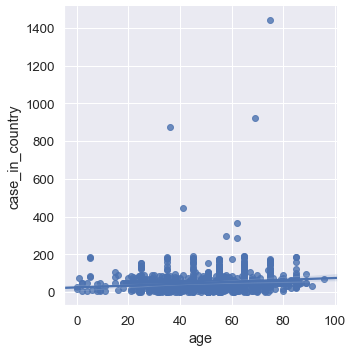

In [23]:
sns.lmplot(x='age', y='case_in_country', data=df)

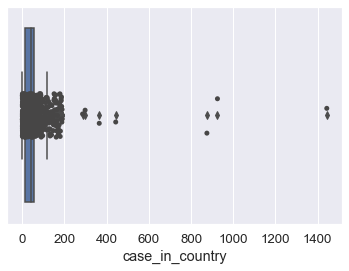

In [24]:
sns.boxplot(x="case_in_country", data=df)
sns.stripplot(x="case_in_country", data=df, color="#474646")

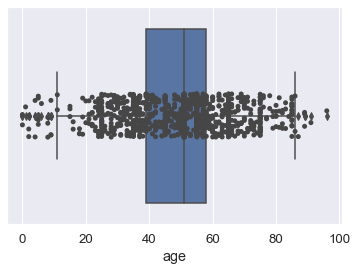

In [25]:
sns.boxplot(x="age", data=df)
sns.stripplot(x="age", data=df, color="#474646")

Appearently both the case_in_country and age contains outliers, therefore the outliers observation will be determined in accordence with the First quartle, the third quartle and the inter quartle range and will be replaced with the median instead 

In [44]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
Q1

id                       272.0
case_in_country           14.0
age                       39.0
If_onset_approximated      0.0
visiting Wuhan             0.0
from Wuhan                 0.0
death                      0.0
recovered                  0.0
Name: 0.25, dtype: float64

In [45]:
list1 = ["case_in_country","age"]

for x in list1:
    df.loc[(df[x] < (Q1[x] - 1.5 * IQR[x])) | (df[x] > (Q3[x] + 1.5 * IQR[x])), x] = df[x].median()

# Data Visulaztion for case_in-country and age after removing the outliers 

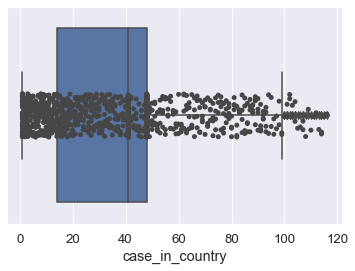

In [46]:
sns.boxplot(x="case_in_country", data=df)
sns.stripplot(x="case_in_country", data=df, color="#474646")

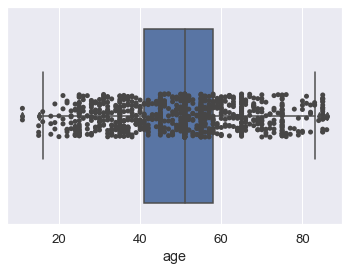

In [47]:
sns.boxplot(x="age", data=df)
sns.stripplot(x="age", data=df, color="#474646")

# Some data proprecessing over the hospital visit date 

In [27]:
df["hosp_visit_date"] = pd.to_datetime(df["hosp_visit_date"], infer_datetime_format=True)

In [28]:
df['hosp_Year'] = df['hosp_visit_date'].dt.year
df['hosp_Month'] = df['hosp_visit_date'].dt.month
df['hosp_Month_Name'] = df['hosp_visit_date'].dt.month_name()
df['hosp_Week'] = df['hosp_visit_date'].dt.week
df['hosp_Day'] = df['hosp_visit_date'].dt.day
df["hosp_Day_Name"]=  df['hosp_visit_date'].dt.day_name()


In [29]:
df["hosp_Month_Name"].value_counts()

January     837
February    246
December      2
Name: hosp_Month_Name, dtype: int64

# Some data Visualization 

In [51]:
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

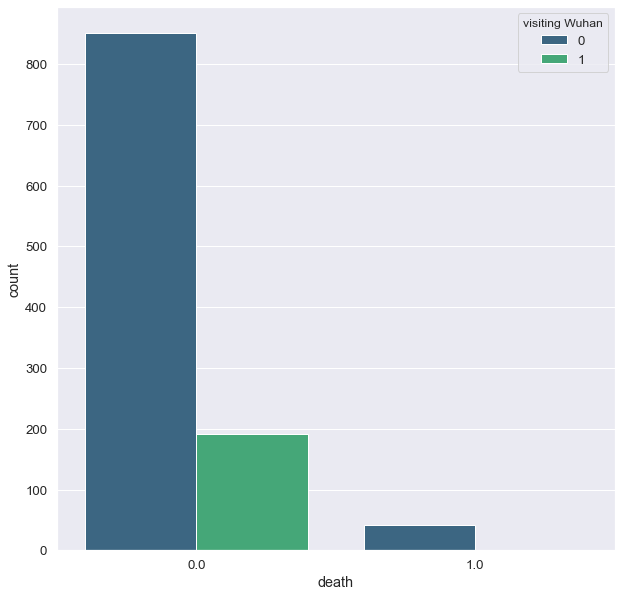

In [52]:
sns.countplot(x='death',hue="visiting Wuhan", data=df, palette='viridis')

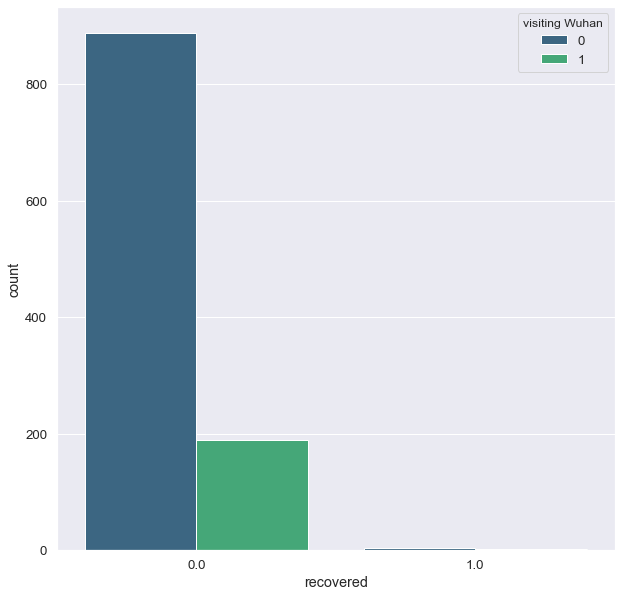

In [53]:
sns.countplot(x="recovered", hue ='visiting Wuhan', data=df, palette='viridis')

In [54]:
sns.set(rc={'figure.figsize': [25, 25]}, font_scale=1.2)

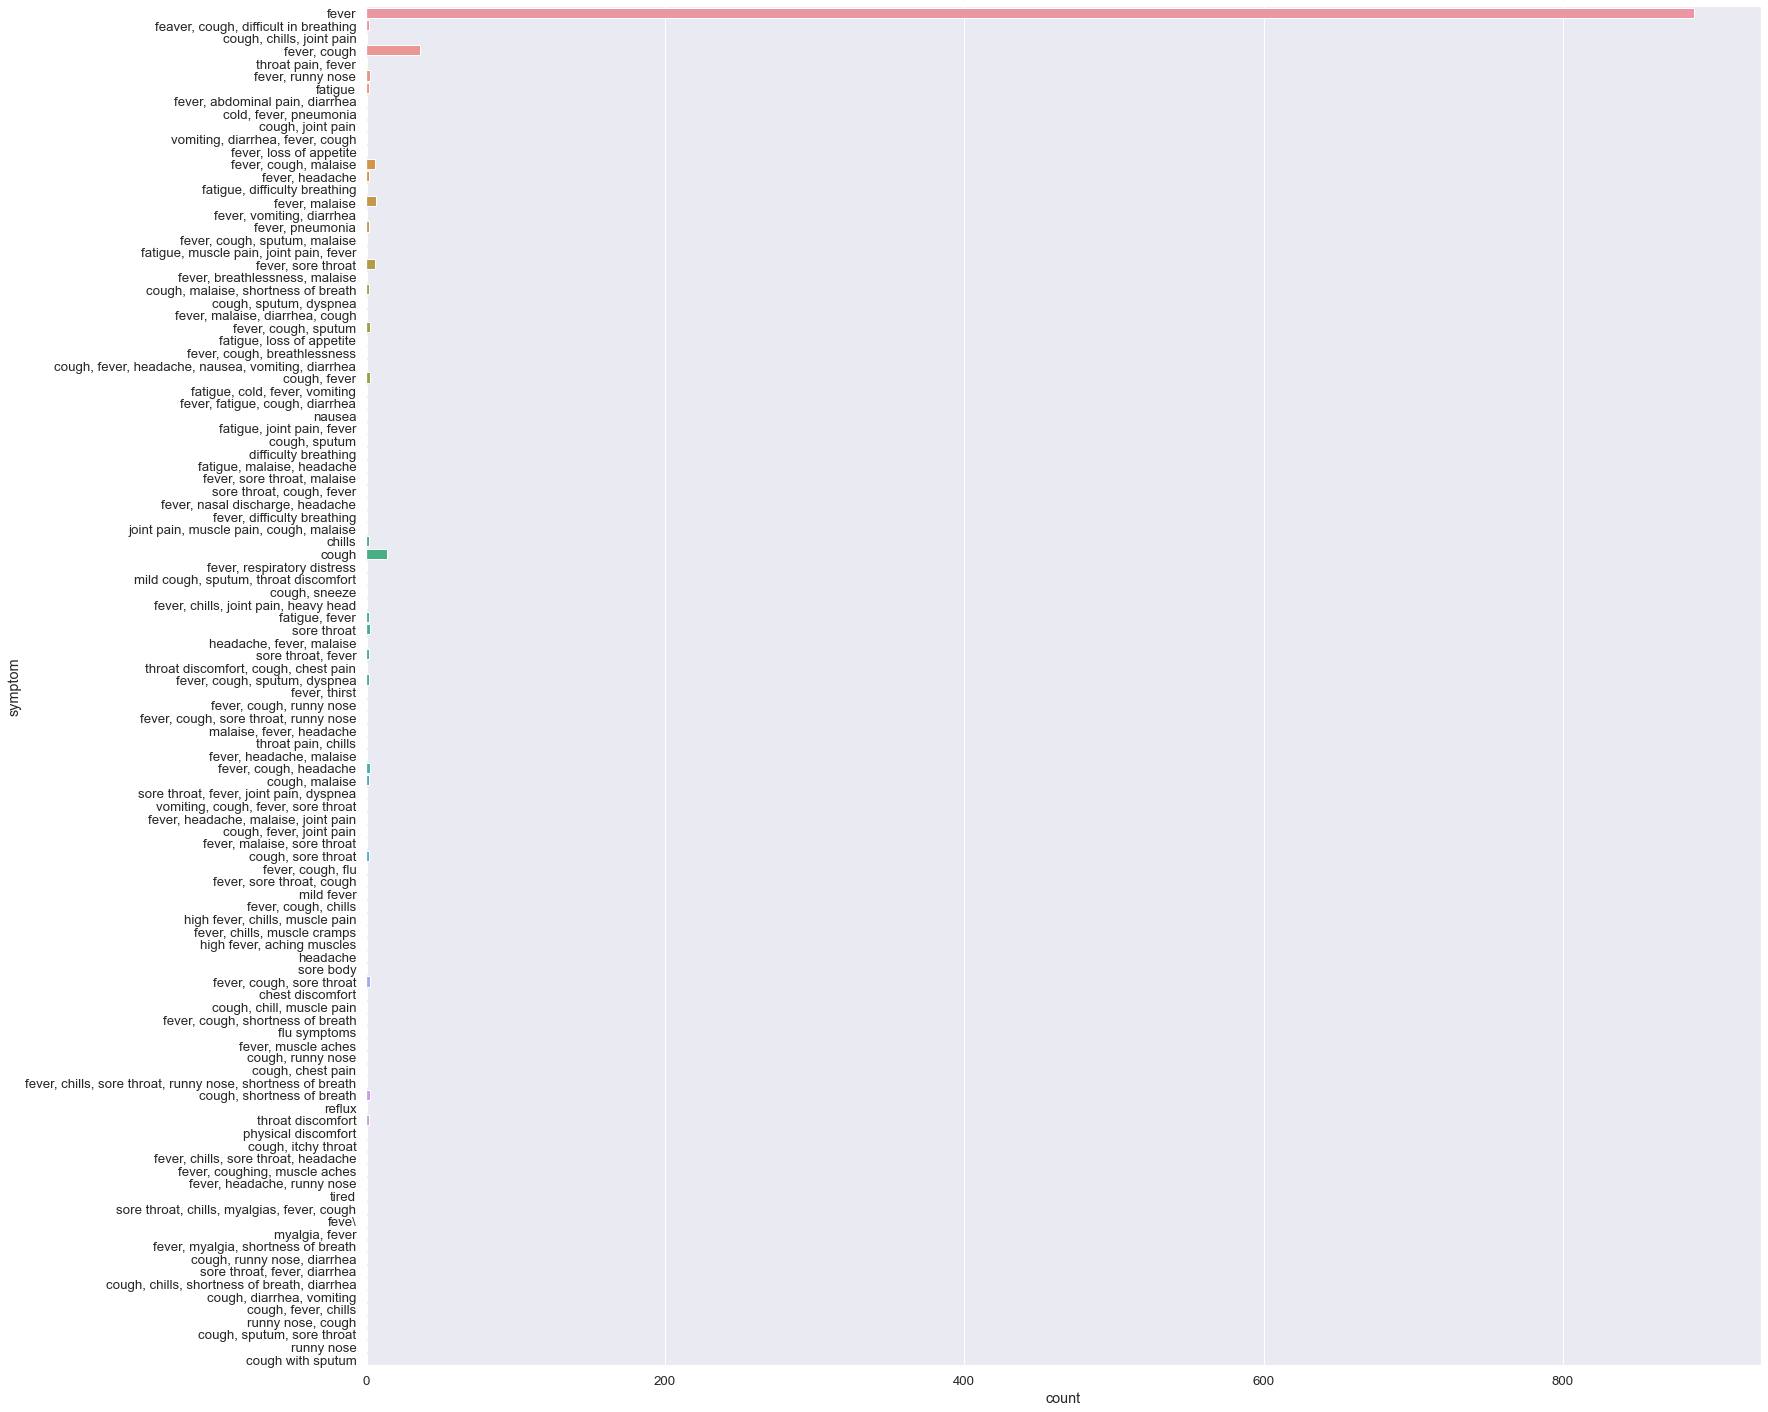

In [55]:
sns.countplot(y="symptom", data = df) # from the follwoing plot, it is noticed that the common symptom is fiver

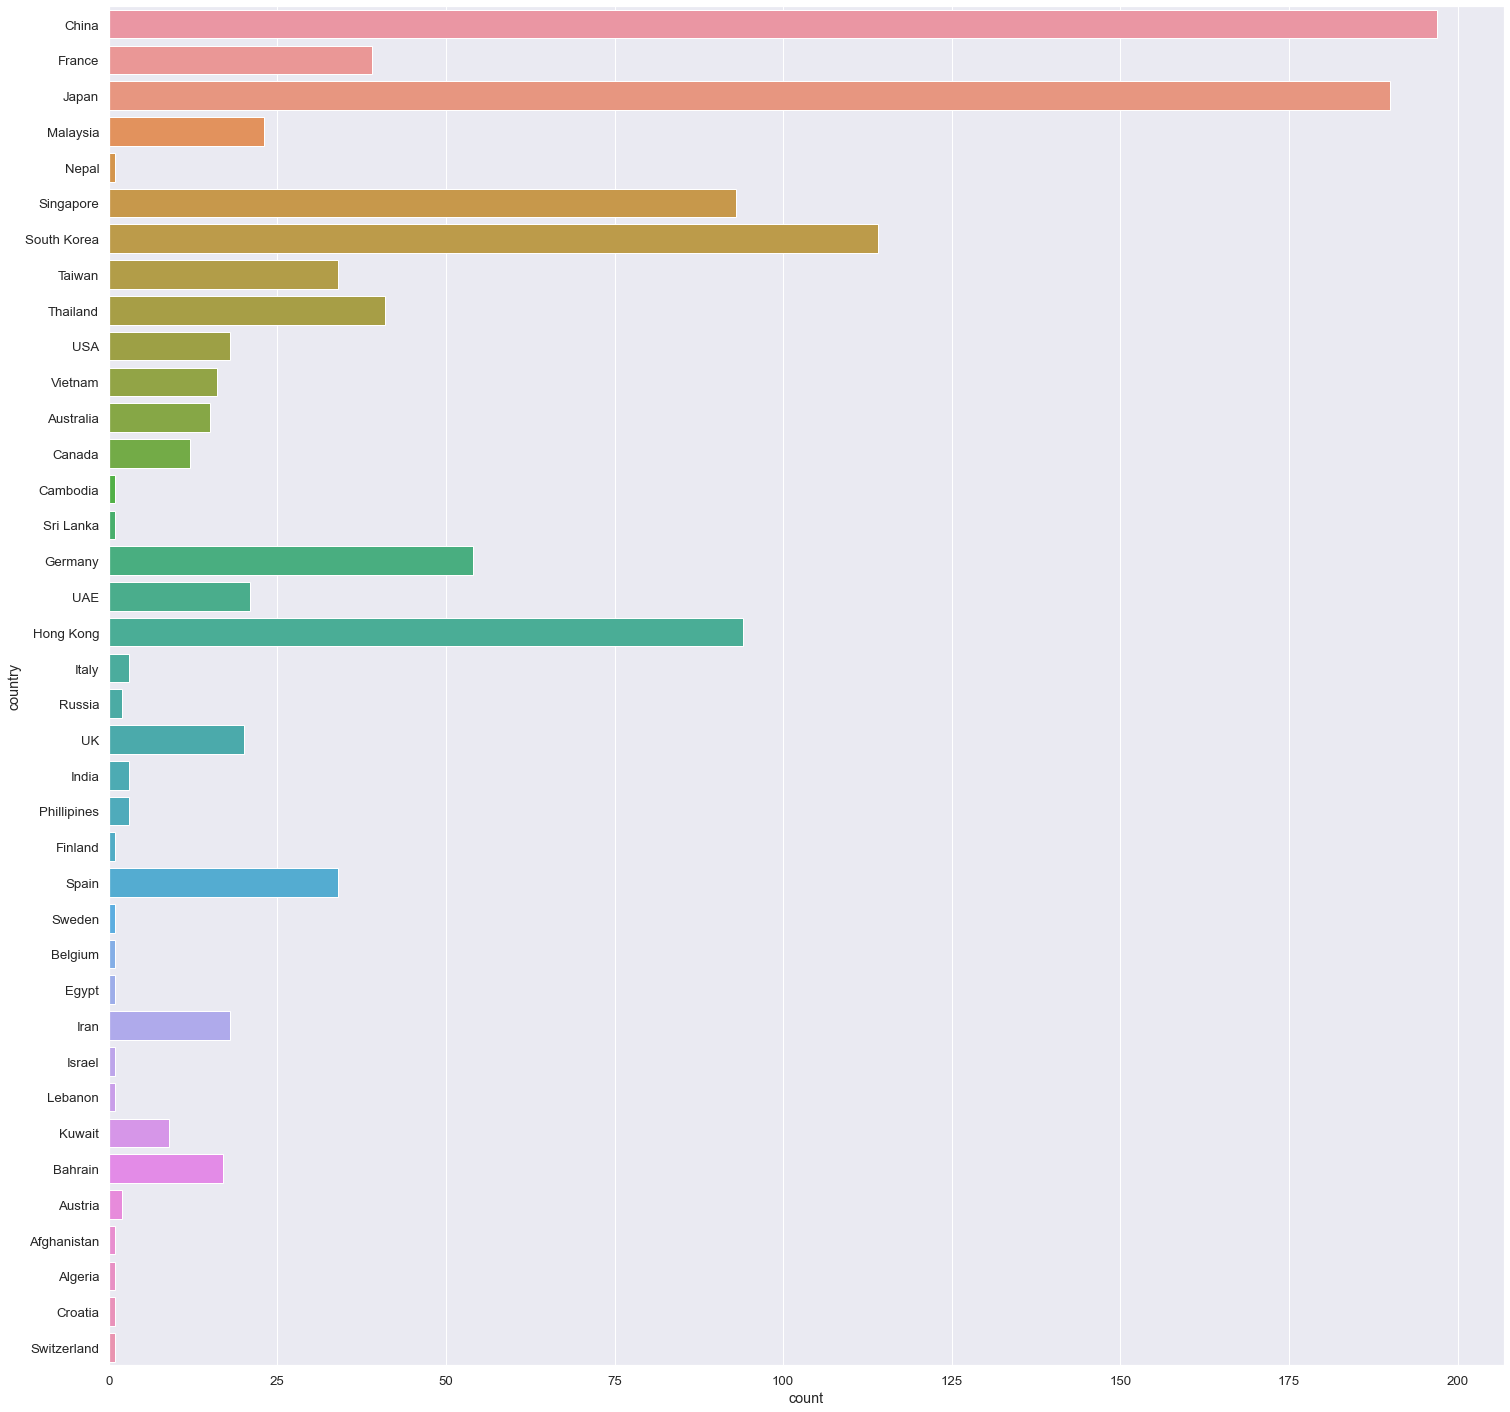

In [56]:
sns.countplot(y="country", data=df)

In [57]:
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

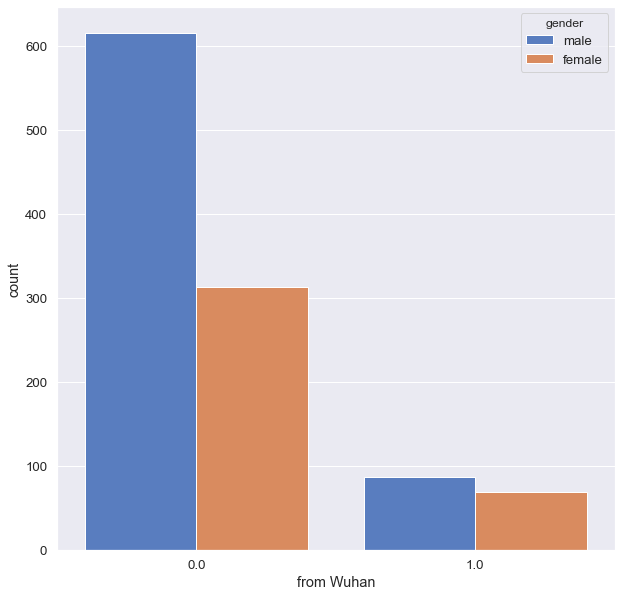

In [58]:
sns.countplot(x='from Wuhan', data=df, hue='gender', palette='muted')

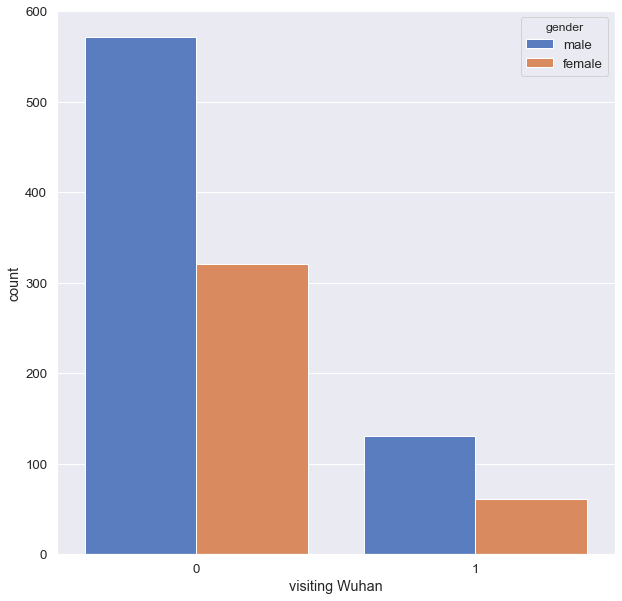

In [59]:
sns.countplot(x='visiting Wuhan', data=df, hue='gender', palette='muted')

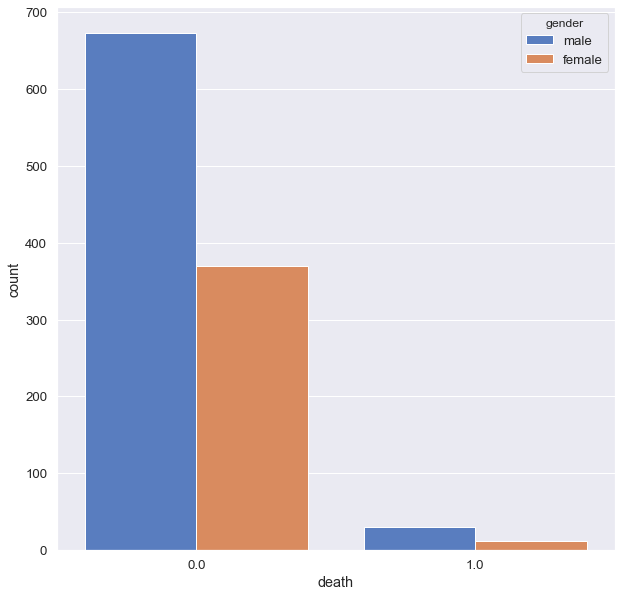

In [60]:
sns.countplot(x='death', data=df, hue='gender', palette='muted')
# it can be noticed that Males were more vulnearble to death compared to Females 

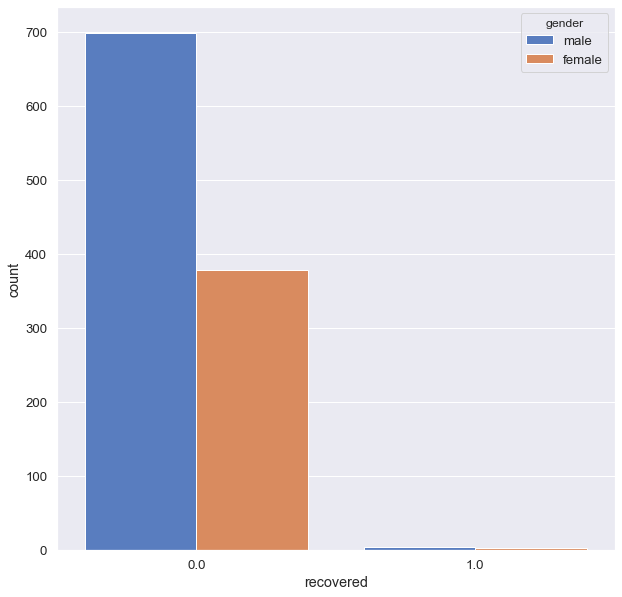

In [61]:
sns.countplot(x='recovered', data=df, hue='gender', palette='muted')

In [62]:
sns.set(rc={'figure.figsize': [30, 30]}, font_scale=1.2)

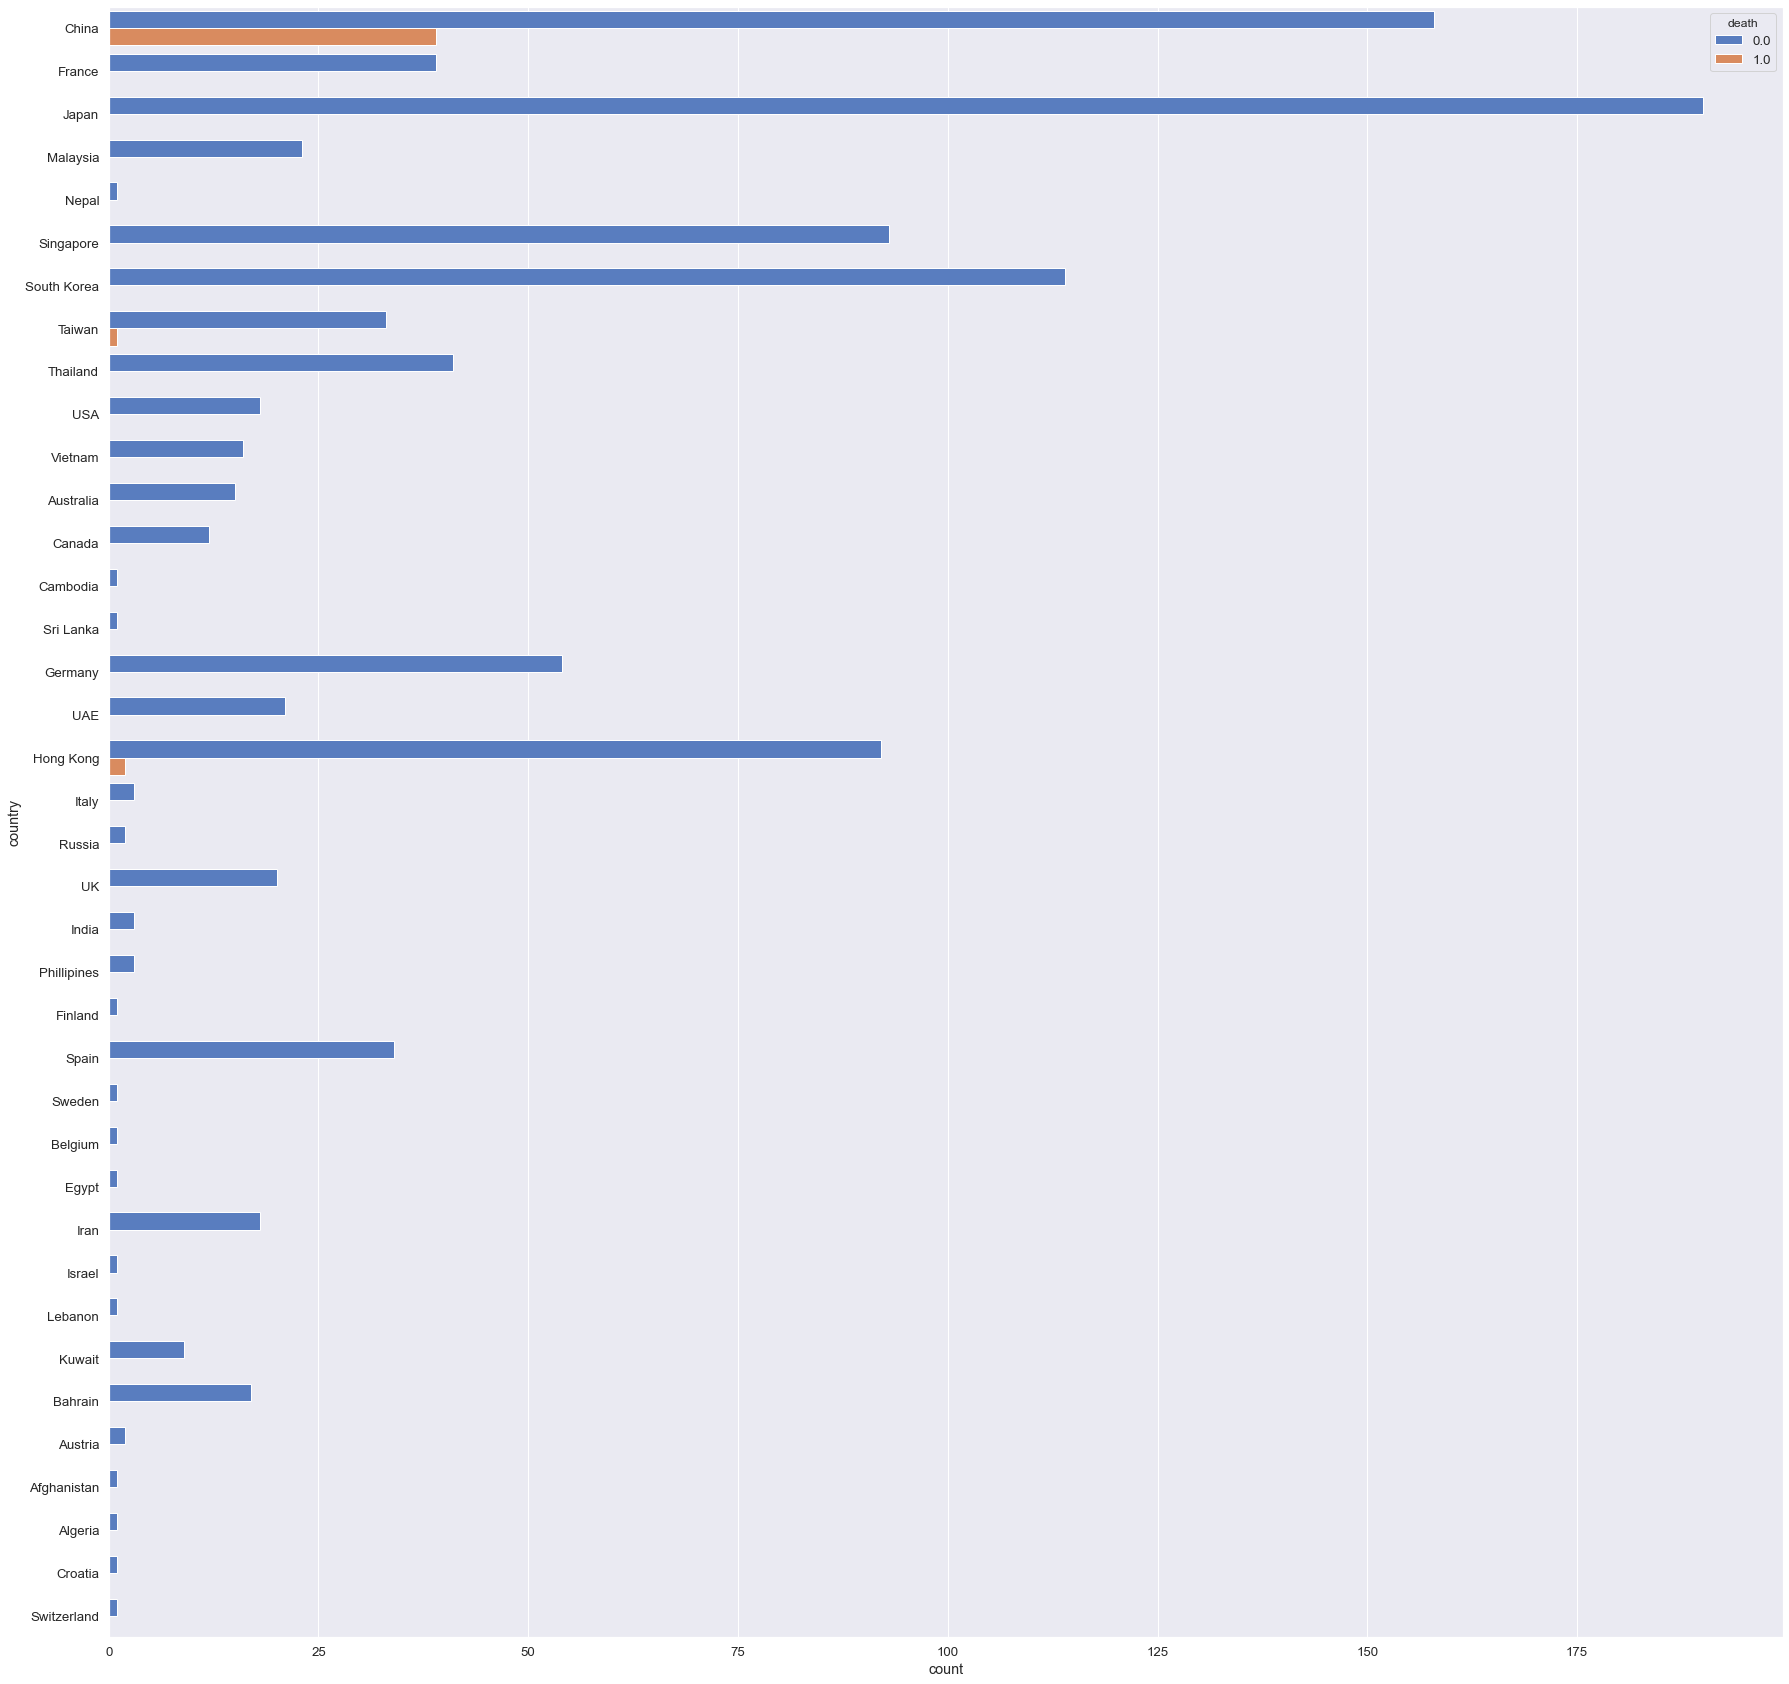

In [63]:
sns.countplot(y='country', data=df, hue="death", palette='muted')
# it can be noticed that China, Taiwan and Hong kong had alerting number of deaths

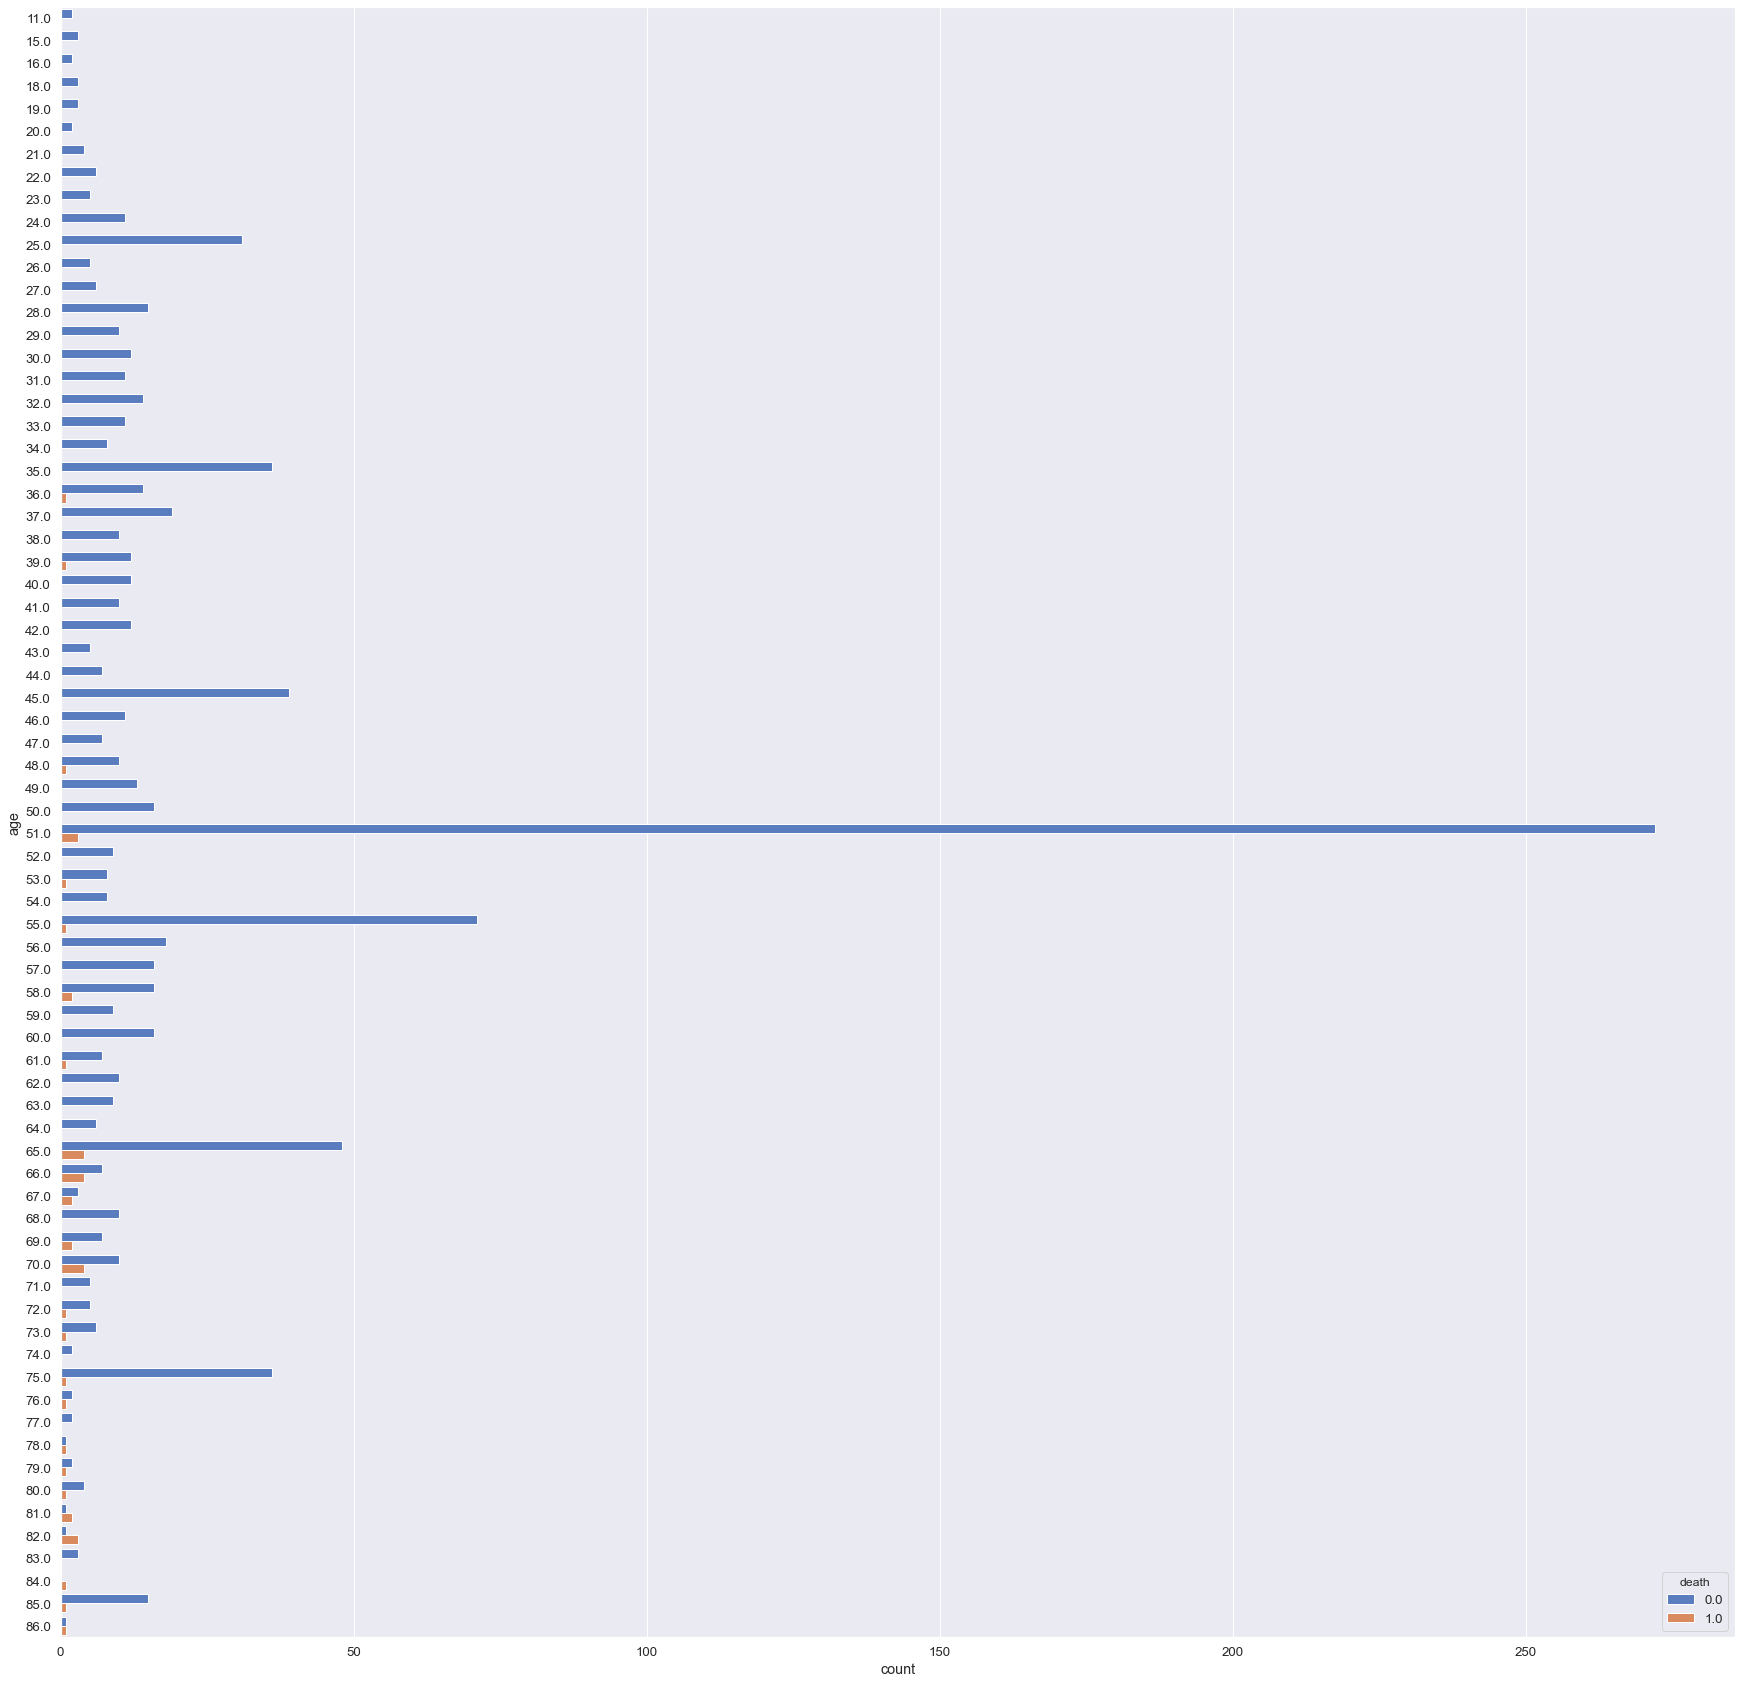

In [64]:
sns.countplot(y='age', data=df, hue="death", palette='muted')
# it can be noticed from the following graph that most of deaths occured to patients above the ag of 50 
# and some death occured to age 36, 39 and 48 

In [65]:
sns.set(rc={'figure.figsize': [30, 30]}, font_scale=1.2)

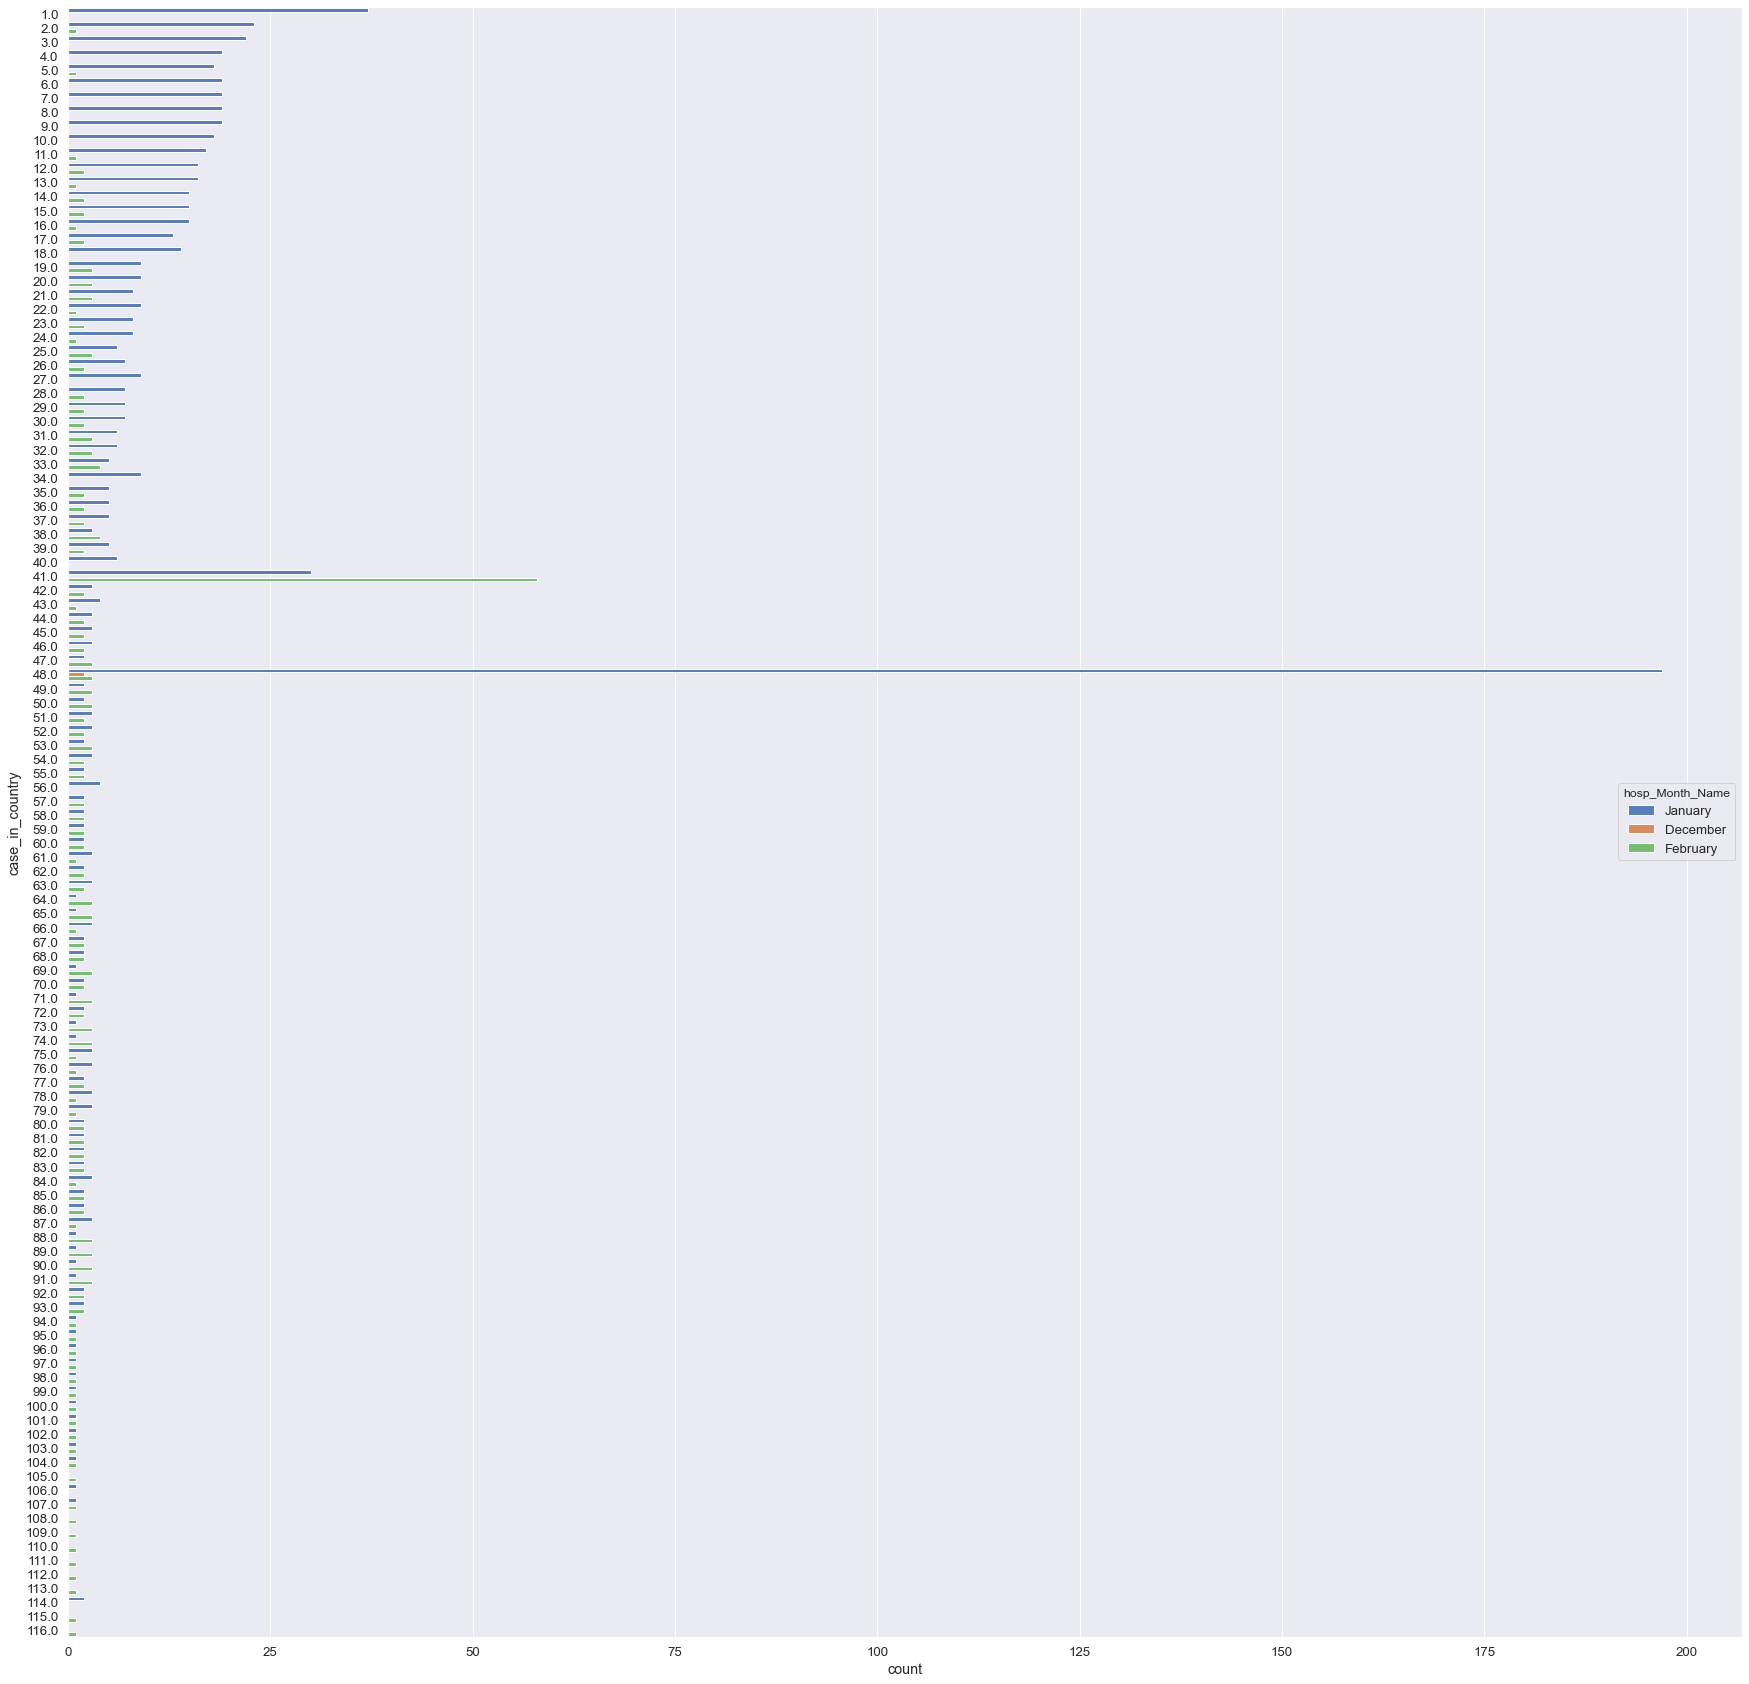

In [66]:
sns.countplot(y='case_in_country', data=df, hue="hosp_Month_Name", palette='muted')
# As it can be noticed the majority of reported cases were reprted in January and February Months 

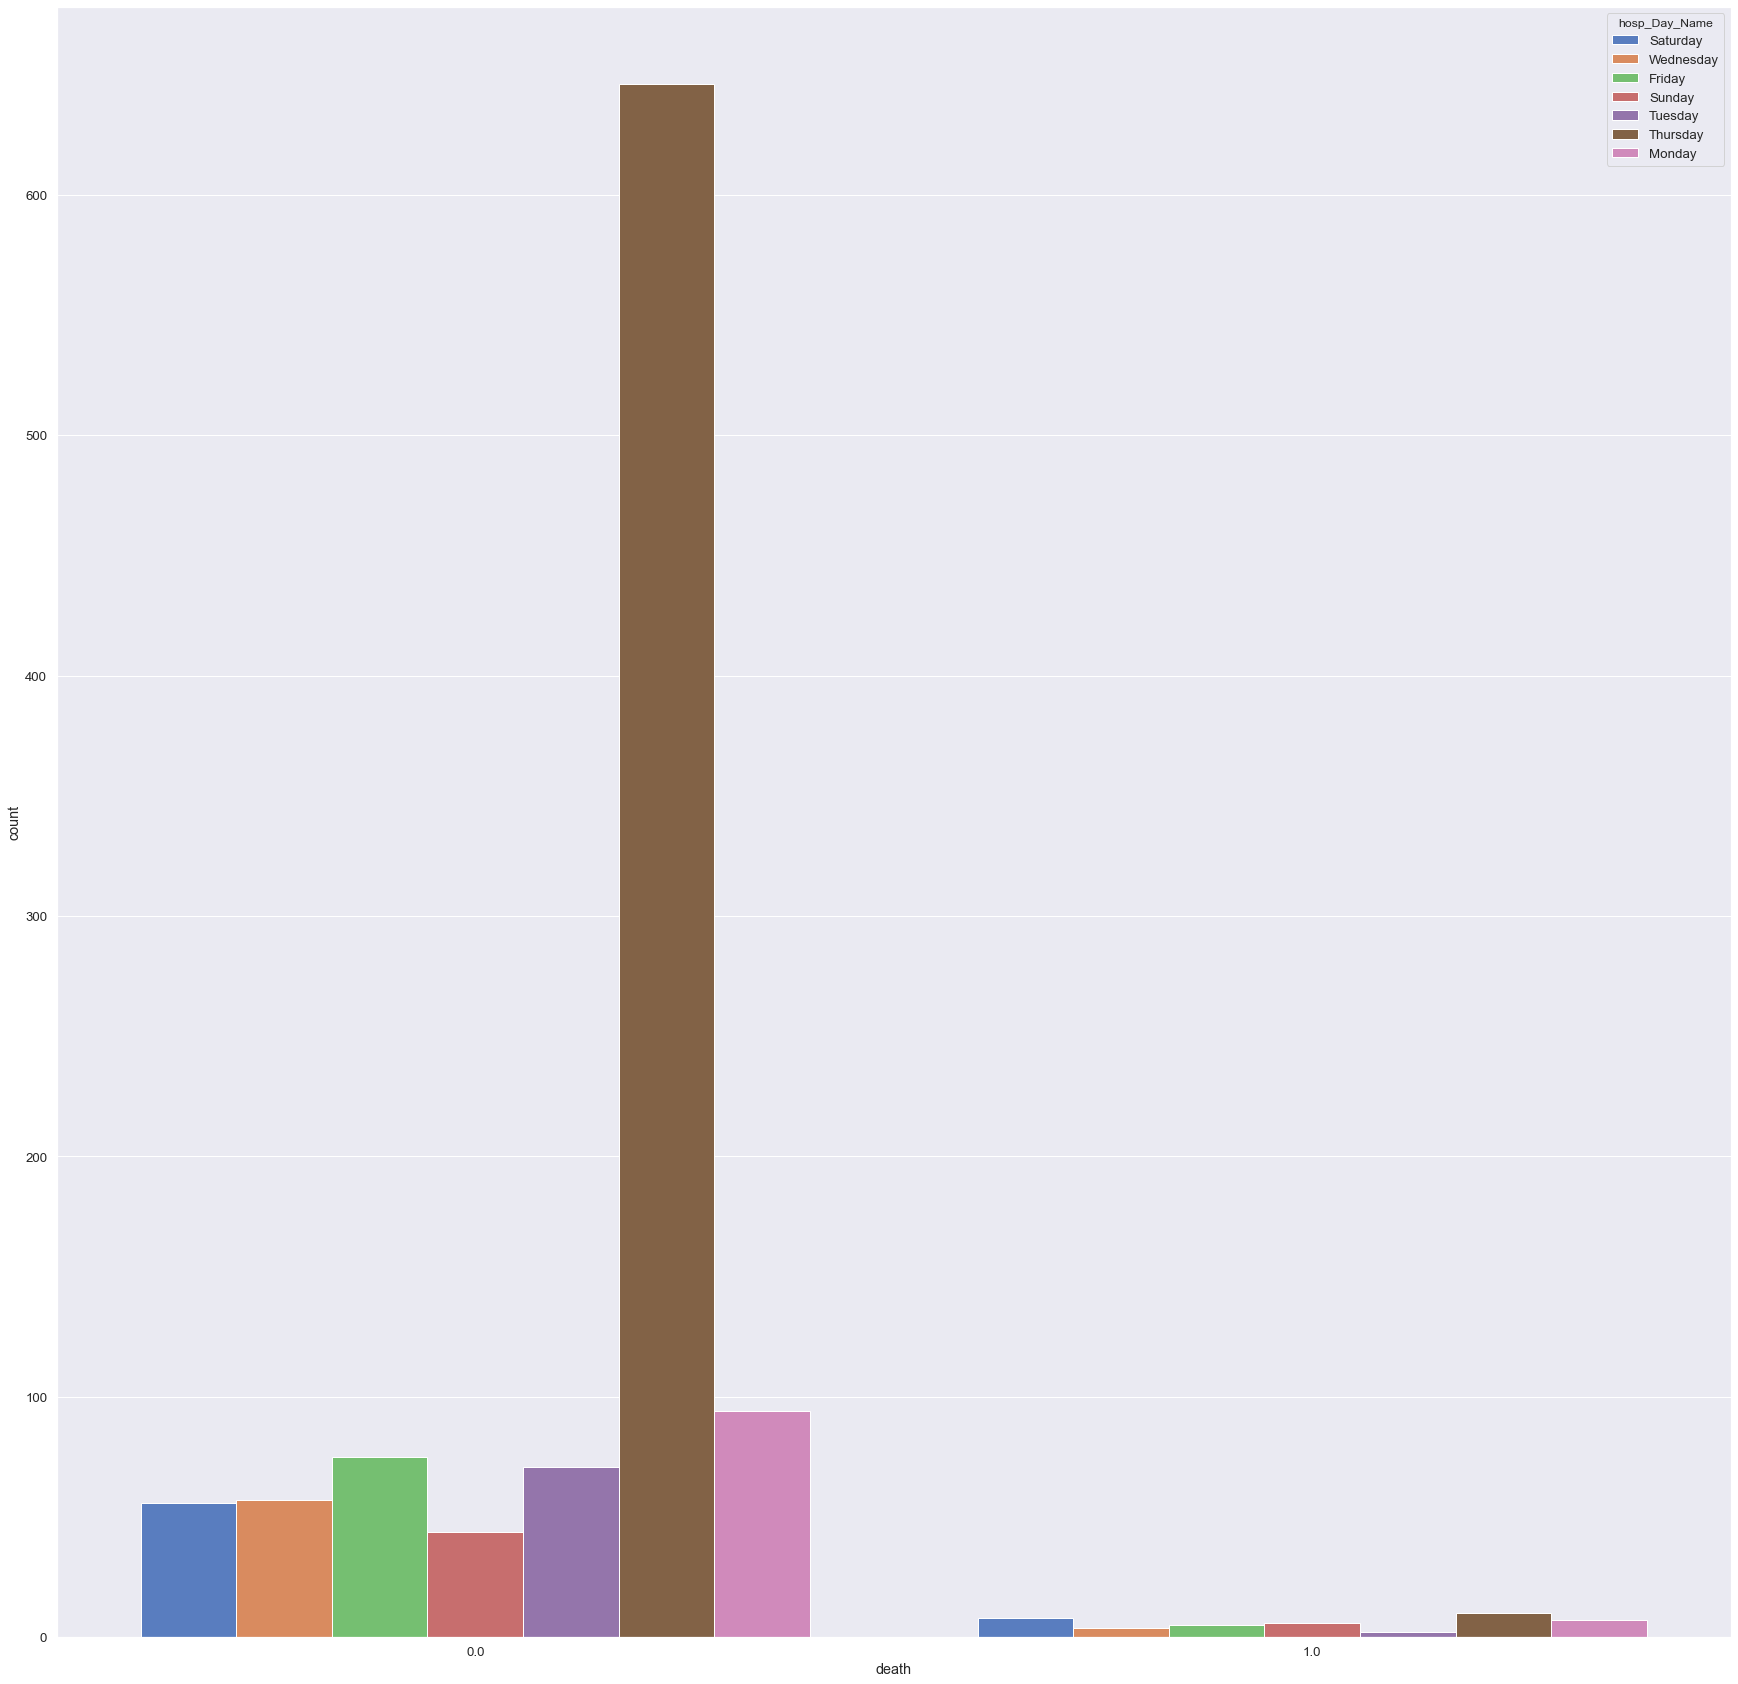

In [67]:
sns.countplot(x='death', data=df, hue="hosp_Day_Name", palette='muted')